## 1. 모듈 불러오기

In [1]:
import nltk

from konlpy.tag import Twitter, Mecab, Kkma
twitter = Twitter(); mecab = Mecab(); kkma = Kkma()

from collections import Counter

import numpy as np

from wordcloud import WordCloud

from imread import imread

import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
font_fname = '/Library/Fonts/AppleGothic.ttf'
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family = font_name)

## 2. Predict 함수

#### 1) Bag Of Words 함수

In [2]:
refined_reviews = open("refined_reviews.txt").readlines()[:100]

In [24]:
def bow(data, targets):
    
    output = np.zeros(shape=[len(data), len(targets)], dtype = np.int32)
    
    
    #only text
    text_list = []
    for review in data:
        text = review.split(" | ")[4]
        text_list.append(text)
    
    
    #pos tagging / word in targets / count / index
    for i in range(len(text_list)):
        words = twitter.pos(text_list[i], norm=True, stem=True)
        words = [word for (word, tag) in words if word in targets]

        cnt = Counter(words)

        for word in cnt.keys():
            idx = targets.index(word)
            output[i, idx] = cnt[word]        
        
    return output

In [25]:
print(bow(refined_reviews[:3], ['수업', '영어', '션', '학점']))

[[2 1 0 0]
 [0 1 2 1]
 [0 0 0 1]]


#### 2) Predict 함수

In [26]:
def predict(data):
    
    pos_targets = ['좋다', '좋아하다', '재밌다', '재미있다', '친절하다', '괜찮다', '편하다', '꼼꼼하다',
               '유익하다', '흥미롭다', '착하다', '새롭다', '깔끔하다', '만족스럽다', '훌륭하다']
    
    neg_targets = ['싫다', '싫어하다', '어렵다', '없다', '힘들다', '지루하다', '딱하다', '나쁘다',
               '아쉽다', '귀찮다', '이상하다', '아깝다', '부담스럽다', '재미없다', '심하다']
    
    
    output = []
    
    pos = bow(data, pos_targets)
    neg = bow(data, neg_targets)
    
    p = np.sum(pos, axis = 1)
    n = np.sum(neg, axis = 1)
    
    for i in range(len(data)):
        total = p[i] - n[i]

        if total >= 0:
            result = 'Positive'
        else:
            result = 'Negative'
        output.append(result)
        
    return output

In [5]:
print(predict(refined_reviews))

['Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Negative', 'Positive', 'Negative', 'Positive', 'Positive', 'Negative', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Negative', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Negative', 'Positive', 'Negative', 'Positive', 'Positive', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative', 'Positive', 'Negative', 'Po

## 3. Wordcloud

#### 1) Top 200 words list 만들기

In [20]:
neg_sents = open("negative_sents.txt").read()

In [ ]:
neg_top_list = open("negative_top200_list.txt", "w")

In [22]:
stemmed_words = twitter.pos(neg_sents, norm = True, stem = True)
stemmed_words = [word for (word, tag) in stemmed_words if tag == "Adjective" or tag == "Adverb"]


stopwords_list = ['다', '히', '첨', '씩', '야하다', '스럽다', '이다']
word_list = []

for word in stemmed_words:
    if word not in stopwords_list:
        word_list.append(word)


fdist = nltk.FreqDist(word_list)
fdist_common = fdist.most_common(200)


for (word, freq) in fdist_common:
    total = " : ".join([word, str(freq), str(round(freq / len(stemmed_words), 3))]) + '\n'
    neg_top_list.write(total)

In [23]:
neg_top_list.close()

In [6]:
neg_top_list = open("negative_top200_list.txt").readlines()


w_neg_top_list = []

for line in neg_top_list:
    word = line.split(" : ")[0]
    w_neg_top_list.append(word)

text = " ".join(w_neg_top_list)

print(text)

있다 같다 없다 많다 좋다 어렵다 많이 아니다 열심히 힘들다 그렇다 그래도 중요하다 굉장하다 근데 엄청 어떻다 쉽다 괜찮다 그렇게 없이 재밌다 높다 그래서 이렇다 지루하다 상당하다 편하다 매주 따로 솔직하다 어느 좋아하다 딱하다 재미있다 꼼꼼하다 나쁘다 이쁘다 친절하다 부족하다 특히 아쉽다 다르다 흥미롭다 충분하다 빠르다 성실하다 필요하다 낮다 귀찮다 이렇게 되게 비슷하다 딱 작다 엄청나다 간단하다 가능하다 그만큼 착하다 결국 적당하다 확실하다 강하다 기대하다 유익하다 새롭다 이상하다 자세하다 다양하다 정확하다 걍 빨리 깊다 훨씬 맨날 싫다 미치다 그걸 짧다 아깝다 싫어하다 그나마 상관없다 부담스럽다 유리하다 명확하다 길다 재미없다 꾸준하다 이미 아무래도 매시간 함께 심하다 그저 웬만하다 불편하다 혹은 유명하다 똑같다 당연하다 아무리 헷갈리다 철저하다 가볍다 꽉꽉 바쁘다 넓다 자유롭다 완벽하다 정말로 필요없다 분명하다 단순하다 답답하다 엄격하다 가깝다 시르다 아무튼 깔끔하다 버겁다 완전하다 즐겁다 특별하다 느리다 그건 평범하다 뛰어나다 왠만하다 똑같이 대단하다 또는 당하다 덥다 잦다 궁금하다 잘나다 복잡하다 적절하다 하기는 의외로 두껍다 조금씩 아프다 얕다 귀엽다 피곤하다 죄송하다 불가능하다 훌륭하다 괜히 익숙하다 편안하다 나긋나긋 특이하다 급하다 그러면 뿐이다 어디서 사소하다 암튼 밉다 빡치다 흑 적어도 다행히 천천히 뻔하다 괴롭다 만족스럽다 약하다 무리다 젊다 신기하다 멀다 아무렇다 이러하다 똑똑하다 슬프다 안타깝다 정직하다 고통스럽다 어떠하다 으 번거롭다 설렁설렁 만만하다 수시로 때우다 독특하다 조용하다 빨르다 뿌듯하다 왜냐하면 더럽다 그러니까 간간히 굵다 비싸다


##### pos

In [3]:
pos_sents = open("positive_sents.txt").read()[:5000000]

In [4]:
pos_top_list = open("positive_top200_list.txt", "w")

In [5]:
stemmed_words = twitter.pos(pos_sents, norm = True, stem = True)
stemmed_words = [word for (word, tag) in stemmed_words if tag == "Adjective" or tag == "Adverb"]


stopwords_list = ['다', '히', '첨', '씩', '야하다', '스럽다', '이다']
word_list = []

for word in stemmed_words:
    if word not in stopwords_list:
        word_list.append(word)


fdist = nltk.FreqDist(word_list)
fdist_common = fdist.most_common(200)


for (word, freq) in fdist_common:
    total = " : ".join([word, str(freq), str(round(freq / len(stemmed_words), 3))]) + '\n'
    pos_top_list.write(total)

In [6]:
pos_top_list.close()

#### 2) wordcloud

In [7]:
cloud_mask = np.array(imread("cloud.png"))

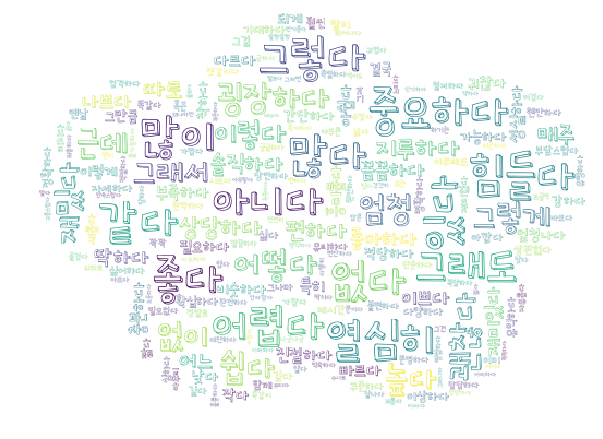

In [36]:
wordcloud = WordCloud(font_path='/Library/Fonts/HUDaku.ttf',
                     max_font_size = 50,
                     background_color = 'white',
                     mask = cloud_mask
                     ).generate(text)

plt.figure(figsize = (10, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("wordcloud_image")
plt.show()
plt.close()